### PRAGADEESH M
## 225229126

### Step 1:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
df = pd.read_csv('ratings_Beauty.csv')
df.sample(5)

,UserId,ProductId,Rating,Timestamp
1132638,A2VF6J2NXONFT,B003Z4QHP0,5.0,1383782400
583189,AX5MMET98OOVZ,B0017T398S,1.0,1303430400
1571745,A1RYI3A5FDPEEL,B007CVLI9M,4.0,1374192000
1838605,A2S3JDF44VG8HD,B00BF26UOW,5.0,1388448000
53250,A1G80Q14HZAUUM,B000142JDG,5.0,1369008000


### Step 2:

In [3]:
df.shape

(2023070, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [5]:
df.describe(include='all')

,UserId,ProductId,Rating,Timestamp
count,2023070,2023070,2.023070e+06,2.023070e+06
unique,1210271,249274,NaN,NaN
top,A3KEZLJ59C1JVH,B001MA0QY2,NaN,NaN
freq,389,7533,NaN,NaN
mean,NaN,NaN,4.149036e+00,1.360389e+09
std,NaN,NaN,1.311505e+00,4.611860e+07
min,NaN,NaN,1.000000e+00,9.087552e+08
25%,NaN,NaN,4.000000e+00,1.350259e+09
50%,NaN,NaN,5.000000e+00,1.372810e+09
75%,NaN,NaN,5.000000e+00,1.391472e+09


### Step 3:

In [6]:
df.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

<Axes: >

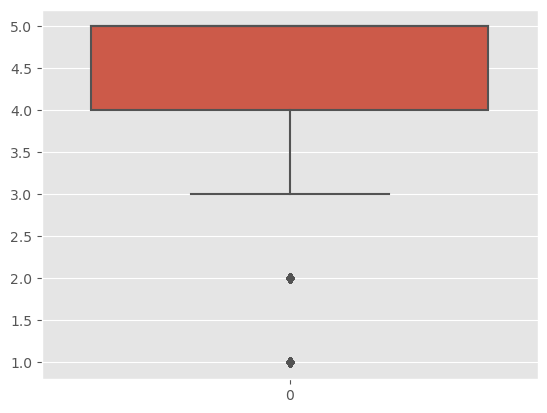

In [7]:
import seaborn as sns
sns.boxplot(df['Rating'])

<Axes: >

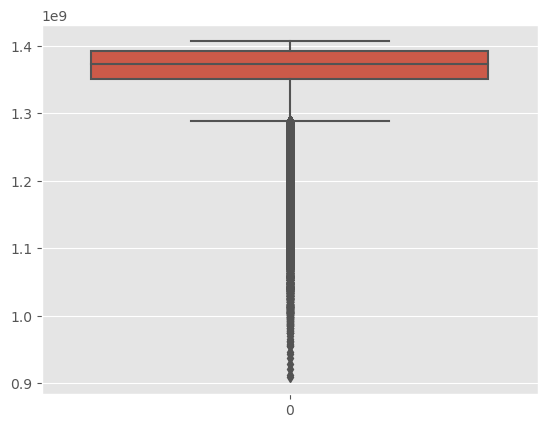

In [8]:
sns.boxplot(df['Timestamp'])

In [9]:
df = df.drop(['UserId'],axis=1)

### Step 4:

In [10]:
df = df.set_index('ProductId')

In [11]:
X = df[['Rating', 'Timestamp']].values
y = df.index.values

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=20)

### Step 5:

In [16]:
X

array([[5.0000000e+00, 1.3696992e+09],
       [3.0000000e+00, 1.3554432e+09],
       [5.0000000e+00, 1.4046912e+09],
       ...,
       [5.0000000e+00, 1.4053824e+09],
       [5.0000000e+00, 1.4055552e+09],
       [5.0000000e+00, 1.4056416e+09]])

In [15]:
product_data

[array([[5.0000000e+00, 1.1632896e+09],
        [5.0000000e+00, 1.3347936e+09],
        [5.0000000e+00, 1.3752288e+09],
        ...,
        [4.0000000e+00, 1.3730688e+09],
        [5.0000000e+00, 1.3588992e+09],
        [5.0000000e+00, 1.3862880e+09]])]

In [19]:
product_id = 'B00004TUBL'

product_data = df.loc[product_id][['Rating', 'Timestamp']].values

recommended_products = knn.kneighbors(X=product_data, n_neighbors=20, return_distance=False)

# List of product IDs form the indexes

products_list = []

for each in recommended_products:
    products_list.append(df.iloc[each].index)

print("Recommended products: ")
print(products_list[1])

Recommended products: 
Index(['B00004TUBL', 'B00021C1LI', 'B000172R76', 'B0002DUSSY', 'B0000UTUW4',
       'B00014WW38', 'B00021AK4I', 'B000196U04', 'B000056KK0', 'B0000CGKLV',
       'B000052YN5', 'B000142AZ8', 'B0001FF80G', 'B00027DDOQ', 'B0001APV44',
       'B0001AQCII', 'B000052ZTY', 'B00008WFSM', 'B0000AJ3PU', 'B0000535UA'],
      dtype='object', name='ProductId')
